In [1]:
import torch
import gpytorch
import numpy as np
import pandas as pd

from bo_functions import calc_ei_basic
from bo_functions import ExactGPModel
from bo_functions import calc_GP_outputs
from bo_functions import train_GP_model
from bo_functions import create_sse_point_data
from bo_functions import calc_y_exp

from bo_plotters import plot_hyperparams
from bo_plotters import y_plotter_basic
from bo_plotters import stdev_plotter_basic
from bo_plotters import ei_plotter_basic

In [2]:
#Pull x data from CSV
Theta_True = np.array([1,-1])
noise_std = 0.1**2

exp_data_doc = "exp_data.csv"
exp_data = np.array(pd.read_csv(exp_data_doc, header=0,sep=","))
Xexp = exp_data[:,1]
Yexp = exp_data[:,2]
# print(x)

In [3]:
#Pull training data from CSV
train_data_doc = "train_2_in_data.csv"
train_data = np.array(pd.read_csv(train_data_doc, header=0,sep=","))
train_T = torch.tensor(train_data[:,1:3])
train_sse = torch.tensor(train_data[:,3])
print(train_sse)

tensor([113.0903,  71.7798,   2.5876, 207.4021,  43.4121,   4.6411, 104.9188,
        193.7594,  60.5787,  52.6786, 124.2697,  64.9917,  71.8940, 217.2584,
        344.4019,  15.3148, 255.9665,  29.8778, 245.9522], dtype=torch.float64)


In [4]:
#Define GP Testing space
#Define Testing Space
p=10
Theta1 =  np.linspace(-2,2,p) #1x10
Theta2 =  np.linspace(-2,2,p) #1x10
theta_mesh = np.array(np.meshgrid(Theta1, Theta2)) #2 Uniform 5x5 arrays
theta_space = torch.tensor(theta_mesh.T.reshape(-1, 2)) #25 x 2
# print(test_T)

The GP predicts that Theta1 = 1.1111111111111107 and Theta2 = -1.5555555555555556
The point that should be sampled next is Theta1 = -1.1111111111111112 and Theta2 = 2.0


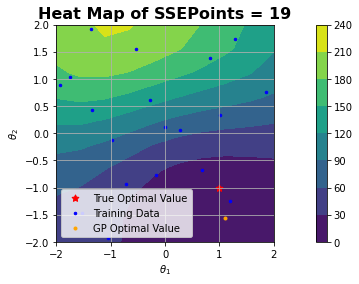

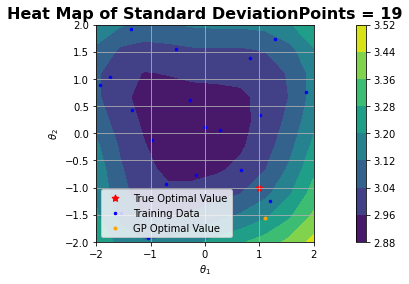

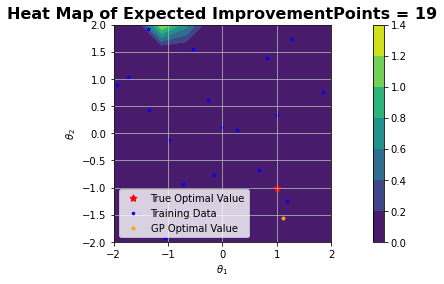

The GP predicts that Theta1 = 1.1111111111111107 and Theta2 = -1.5555555555555556
The point that should be sampled next is Theta1 = -1.1111111111111112 and Theta2 = 2.0


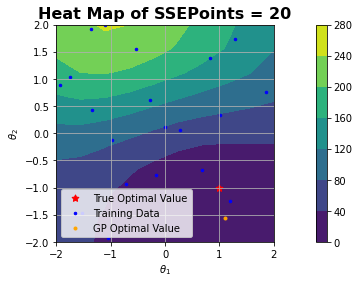

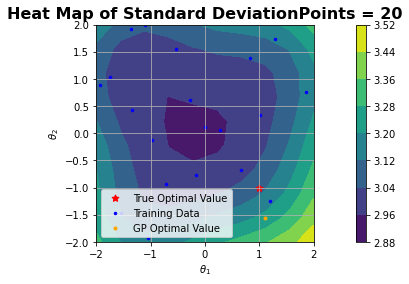

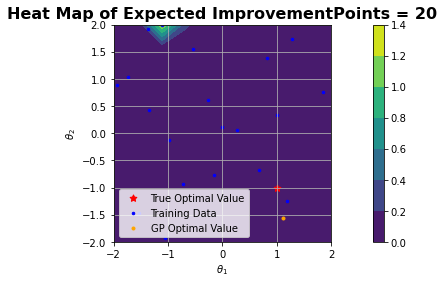

The GP predicts that Theta1 = 1.1111111111111107 and Theta2 = -1.5555555555555556
The point that should be sampled next is Theta1 = -1.1111111111111112 and Theta2 = 2.0


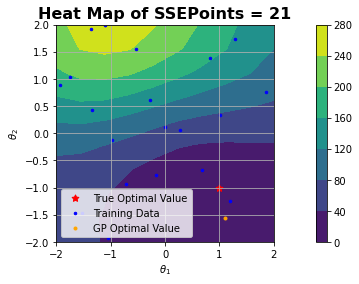

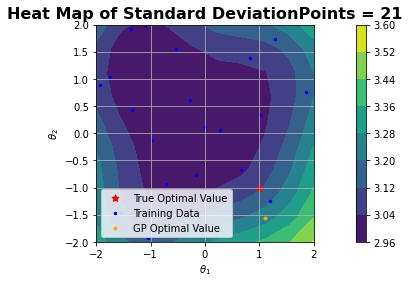

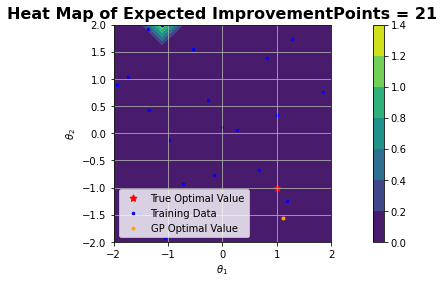

In [5]:
#Training the GP Model
iterations = 300
BO_iter =3
for i in range(BO_iter):
    if torch.is_tensor(train_T) != True:
        train_T = torch.from_numpy(train_T)
    if torch.is_tensor(train_sse) != True:
        train_sse = torch.from_numpy(train_sse)
    # initialize likelihood and model
    ##Assumes a homoskedastic noise model p(y | f) = f + noise
    likelihood = gpytorch.likelihoods.GaussianLikelihood()

    # We will use the simplest form of GP model, exact inference
    #Defines our model in terms of the class parameters in bo_functions
    model = ExactGPModel(train_T, train_sse, likelihood)
    train_GP = train_GP_model(model, likelihood, train_T, train_sse, iterations, verbose = False)
    
    noise_list = train_GP[0]
    lengthscale_list = train_GP[1]
    outputscale_list = train_GP[2]
    
    #Plot hyperparameters vs iteration
    noise_title = "Noise Hyperparameter"
    lengthscale_title = "Lengthscale Hyperparameter"
    outputscale_title = "Outputscale Hyperparameter"
#     plot_hyperparams(iterations, noise_list,noise_title)
#     plot_hyperparams(iterations, lengthscale_list,lengthscale_title)
#     plot_hyperparams(iterations, outputscale_list,outputscale_title)
    
    model.eval()
    #Puts likelihood in evaluation mode
    likelihood.eval()

   
    
    #Make Plots
    sse_title = "SSE"
    Theta_True = np.array([1,-1])
    y_plotter_basic(theta_mesh, sse_map, Theta_True, Theta_Opt_GP, train_T,sse_title,plot_train=True)
    
    stdev_plotter_basic(theta_mesh, stdev_map,Theta_True, Theta_Opt_GP,train_T,plot_train=True)
    ei_plotter_basic(theta_mesh, ei_map, Theta_True, Theta_Opt_GP,train_T,plot_train=True)
    
#     print(Theta_Best_Ei)
    #Add Best values to training data   
    train_T = train_T.numpy()
    
    #NEED TO FIND sse VALUE ASSOCIATED WITH BEST THETA
    train_sse = train_sse.numpy()
    y_exp_new = calc_y_exp(Theta_True, Xexp, noise_std, noise_mean=0)
    append_sse = create_sse_point_data(Theta_Best_Ei, Xexp, Yexp)

#     #If I remove the value forcibly the code breaks so I'm not sure what to do from here
#     index = 0
#     for i in range(len(theta_space)):
#         if np.array_equiv(theta_space[i], Theta_Best_Ei) ==True:
#             index = i
    
#     theta_space = np.delete(theta_space, i, axis=0)       
    train_T = np.concatenate((train_T, [Theta_Best_Ei]), axis=0)
    train_sse = np.concatenate((train_sse,[append_sse]),axis=0)
#     print(theta_space)
#     print(train_T)
#         train_sse = torch.tensor(train_sse)